In [7]:
import os
from os.path import join as oj
import sys
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
plt.style.use('dark_background')


# load results from a directory

In [77]:
out_dir = '/scratch/users/vision/chandan/dl_theory/sweep_seed_and_hidden1' # differs for chandan/raaz

# pickle load example
fnames = os.listdir(out_dir)
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in fnames]
results = pd.concat(results_list, axis=1).T.convert_objects(convert_numeric=True)
results.head()

/accounts/projects/vision/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,N,accs,batch_size,d_in,d_out,gamma_optimizer,hidden1,labs,losses,lr,max_acc,means,min_loss,norms,num_iters,num_layers,sds,seed,step_size_optimizer,weights
0,2000,"[44.1413, 55.21325, 66.55, 66.55, 66.55, 66.55...",2000,1,2,0.9,10,"[0, 1, 0]","[1098.4197998046875, 1015.0543212890625, 963.5...",0.000001,66.55000,"[0, 20, 40]",869.081543,"[[4.443533120052862, 0.6018111791065763], [4.4...",200,2,"[1, 1, 1]",2,1000,"{0: {'0.weight': [[0.22916783], [-0.23799382],..."
1,2000,"[65.888, 65.888, 65.888, 65.888, 65.93765, 65....",2000,1,2,0.9,4,"[0, 1, 0]","[1204.4912109375, 1195.8162841796875, 1186.959...",0.000001,66.36795,"[0, 20, 40]",938.612061,"[[1.0922830297345252, 0.5687535798642251], [1....",200,2,"[1, 1, 1]",2,1000,"{0: {'0.weight': [[0.22819024], [-0.23790368],..."
2,2000,"[42.8742, 42.8742, 42.8742, 42.8742, 42.8742, ...",2000,1,2,0.9,2,"[0, 1, 0]","[1622.221435546875, 1621.997802734375, 1621.77...",0.000001,43.75900,"[0, 20, 40]",1581.913574,"[[0.7181743602473176, 0.7907956837816528], [0....",200,2,"[1, 1, 1]",1,1000,"{0: {'0.weight': [[0.51519865], [-0.4413817]],..."
3,2000,"[55.50469999999999, 55.50469999999999, 55.5046...",2000,1,2,0.9,5,"[0, 1, 0]","[1156.06396484375, 1155.4306640625, 1154.78771...",0.000001,60.04530,"[0, 20, 40]",1045.480347,"[[4.631121007794945, 0.8766859226721522], [4.6...",200,2,"[1, 1, 1]",3,1000,"{0: {'0.weight': [[-0.99147224], [-0.7889215],..."
4,2000,"[34.2, 34.2, 34.2, 34.2, 34.2, 34.2, 34.2, 34....",2000,1,2,0.9,1,"[0, 1, 0]","[2229.032958984375, 2228.851806640625, 2228.67...",0.000001,34.20000,"[0, 20, 40]",2189.628662,"[[0.4602914166202119, 1.5029032882422513], [0....",200,2,"[1, 1, 1]",1,1000,"{0: {'0.weight': [[0.5152119]], '2.bias': [-0...."


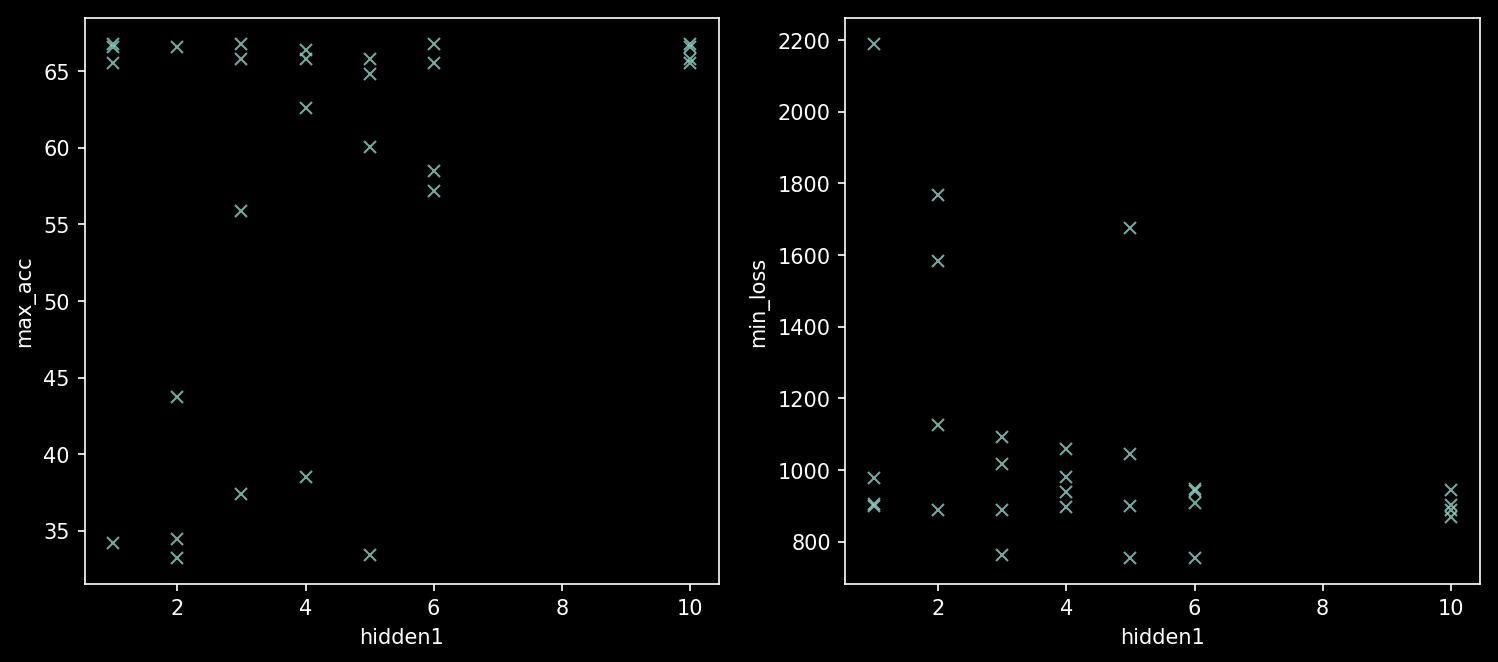

In [78]:
def lmplot(colx, coly, data=results):    
    plt.plot(data[colx], data[coly], 'x', alpha=0.8)
    plt.xlabel(colx)
    plt.ylabel(coly)

plt.figure(figsize=(12, 5), dpi=150)
plt.subplot(121)
lmplot('hidden1', 'max_acc')

plt.subplot(122)
lmplot('hidden1', 'min_loss')

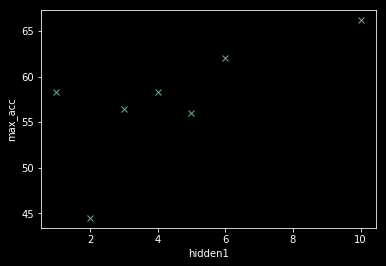

In [73]:
max_accs = results[['max_acc', 'hidden1']].groupby(['hidden1']).mean().reset_index()
max_accs.head()
lmplot('hidden1', 'max_acc', max_accs)